# Reinforcement Learning - đường đi mê cung & dạng lưới 6x6

## Thực hành 20

In [1]:
maze_size = 6
obstacles = [(0, 1), (1, 1), (4, 1), (4,2), (3, 2), (4, 3), (3, 3), (3, 4), (0, 4), (3, 5)]
start = (0, 0)
goal = (0, 5)

def is_valid(x, y):
    return (0 <= x < maze_size) and (0 <= y < maze_size) and (x, y) not in obstacles

def dfs (current, visited, path):
    x, y = current
    if current == goal:
        path.append(current)
        return True
    visited.add(current)
    moves = [(x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1)]
    for move in moves:
        if is_valid(*move) and move not in visited:
            if dfs(move, visited, path):
                path.append(current)
                return True
    return False
visited = set()
path = []
if dfs(start, visited, path):
    path.reverse()
    print("Path found: ")
    for position in path:
        print(position)
    else:
        print("No path found")

Path found: 
(0, 0)
(1, 0)
(2, 0)
(3, 0)
(3, 1)
(2, 1)
(2, 2)
(1, 2)
(0, 2)
(0, 3)
(1, 3)
(2, 3)
(2, 4)
(1, 4)
(1, 5)
(0, 5)
No path found


## Thực hành 21

In [6]:
maze_size = 6
obstacles = [(0, 1), (2, 2), (3, 2), (4,2), (5, 2), (0, 3), (2, 4), (5, 4)]
start = (0, 0)
goal = (0, 5)

def is_valid(x, y):
    return (0 <= x < maze_size) and (0 <= y < maze_size) and (x, y) not in obstacles

def dfs (current, visited, path):
    x, y = current
    if current == goal:
        path.append(current)
        return True
    visited.add(current)
    moves = [(x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1)]
    for move in moves:
        if is_valid(*move) and move not in visited:
            if dfs(move, visited, path):
                path.append(current)
                return True
    return False
visited = set()
path = []
if dfs(start, visited, path):
    path.reverse()
    print("Path found: ")
    for position in path:
        print(position)
else:
    print("No path found")

Path found: 
(0, 0)
(1, 0)
(2, 0)
(3, 0)
(4, 0)
(5, 0)
(5, 1)
(4, 1)
(3, 1)
(2, 1)
(1, 1)
(1, 2)
(1, 3)
(2, 3)
(3, 3)
(4, 3)
(4, 4)
(3, 4)
(3, 5)
(2, 5)
(1, 5)
(0, 5)


## Thực hành 22

Path found: [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (4, 2), (4, 3), (4, 4)]


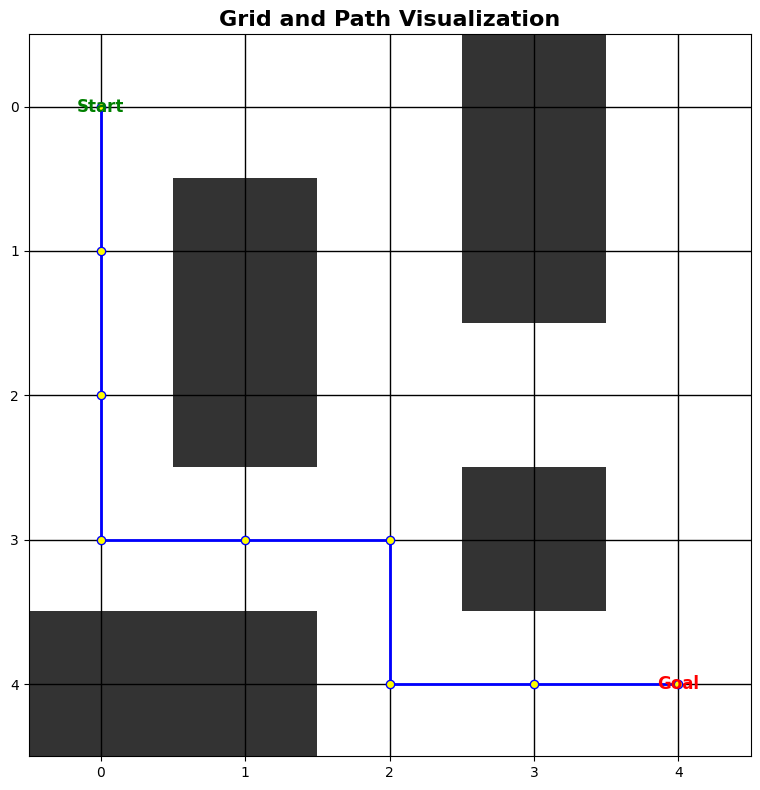

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from collections import deque

MOVES = [(-1, 0), (1, 0), (0, -1), (0, 1)]

class FSSP_BFS:
    def __init__(self, grid, start, goal):
        self.grid = grid
        self.start = start
        self.goal = goal
        self.rows = len(grid)
        self.cols = len(grid[0])

    def is_valid(self, position):
        r, c = position
        return 0 <= r < self.rows and 0 <= c < self.cols and self.grid[r][c] == 0

    def bfs(self):
        queue = deque([(self.start, [self.start])])
        visited = set([self.start])

        while queue:
            current, path = queue.popleft()

            if current == self.goal:
                return path

            for move in MOVES:
                next_r, next_c = current[0] + move[0], current[1] + move[1]
                next_position = (next_r, next_c)

                if self.is_valid(next_position) and next_position not in visited:
                    visited.add(next_position)
                    queue.append((next_position, path + [next_position]))
        return None  # Nếu không tìm thấy đường đi

    def visualize(self, path):
        grid_np = np.array(self.grid)
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.imshow(grid_np, cmap='Greys', alpha=0.8)

        ax.text(self.start[1], self.start[0], 'Start', color='green', fontsize=12, fontweight='bold', ha='center', va='center')
        ax.text(self.goal[1], self.goal[0], 'Goal', color='red', fontsize=12, fontweight='bold', ha='center', va='center')

        if path:
            path_np = np.array(path)
            ax.plot(path_np[:, 1], path_np[:, 0], color='blue', linewidth=2, marker='o', markersize=6, markerfacecolor='yellow', label='Path')

        ax.set_xticks(np.arange(self.cols))
        ax.set_yticks(np.arange(self.rows))
        ax.set_xticklabels(np.arange(self.cols))
        ax.set_yticklabels(np.arange(self.rows))
        ax.grid(which='major', color='black', linewidth=1)
        plt.title("Grid and Path Visualization", fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()
grid = [
    [0, 0, 0, 1, 0],
    [0, 1, 0, 1, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 0, 0]
]
start = (0, 0)
goal = (4, 4)
planner = FSSP_BFS(grid, start, goal)
path = planner.bfs()
if path:
    print(f"Path found: {path}")
    planner.visualize(path)
else:
    print("No path found")


## Thực hành 23

Path found: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (4, 3), (5, 3), (5, 4), (5, 5)]


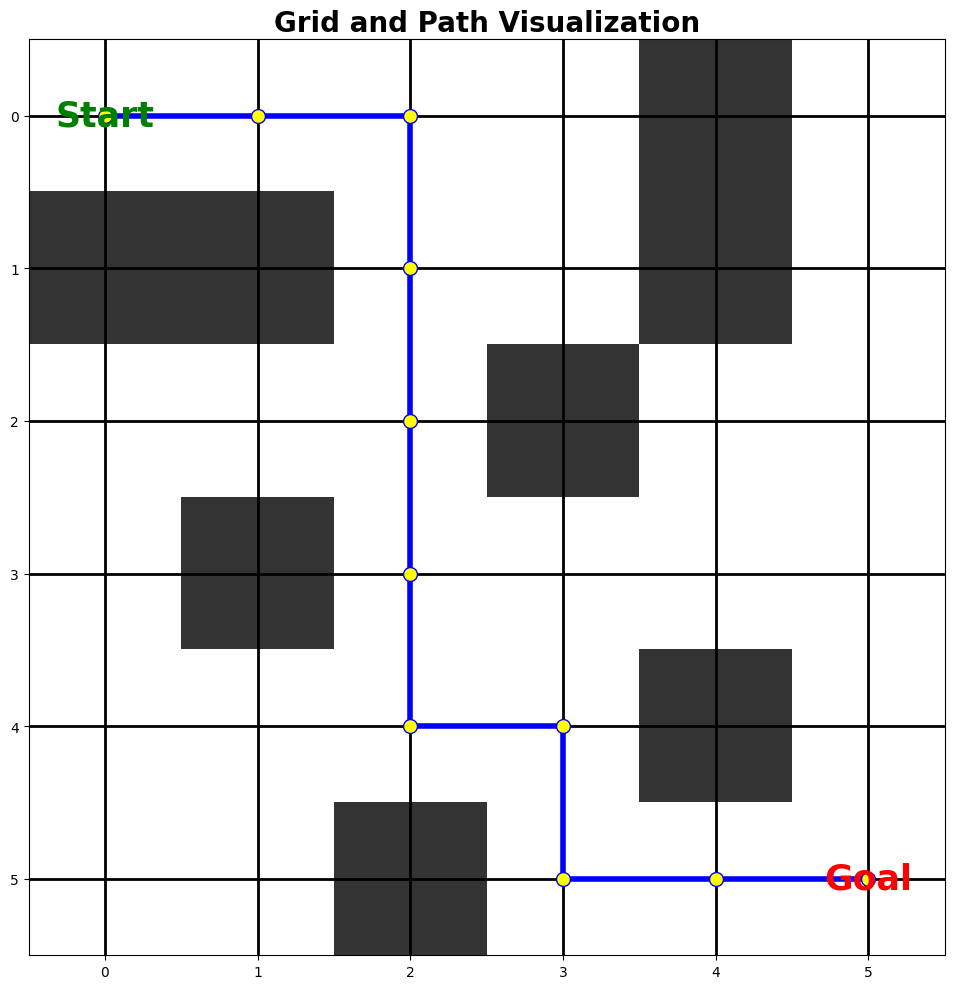

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from collections import deque
#hướng di chuyển có thể: lên, xuống, trái, phải
MOVES = [(-1, 0), (1, 0), (0, 1), (0, 1)]
class FSSP_BFS:
    def __init__(self, grid, start, goal):
        self.grid = grid
        self.start = start
        self.goal = goal
        self.rows = len(grid)
        self.cols = len(grid[0])
#kiểm tra vị trí có nằm trong dạng lưới & vị trí có bị chặn hay không
    def is_valid(self, position):
        r, c = position
        return 0 <= r < self.rows and 0 <= c < self.cols and self.grid [r] [c] == 0
#tìm kiếm theo chiều rộng để tìm đường đi ngắn nhất từ điểm bắt đầu đến điểm kết thúc
    def bfs (self):
        queue = deque ([(self.start, [self.start])])
        visited = set([self.start])
        while queue:
            current, path = queue.popleft()
#nếu vị trí hiện tại là mục tiêu, trả về đường dẫn
            if current == self.goal:
                return path
        
            for move in MOVES:
                next_r, next_c = current [0] + move [0], current [1] + move [1]
                next_position = (next_r, next_c)
                if self.is_valid(next_position) and next_position not in visited:
                    visited.add(next_position)
                    queue.append((next_position, path + [next_position]))
        return None
    def visualize(self, path):
        grid_np = np.array(self.grid)

        fig, ax = plt.subplots (figsize=(10, 10))
        ax.imshow(grid_np, cmap='Greys', alpha=0.8)

        ax.text(self.start [1], self.start[0], 'Start', color='green', fontsize=25, fontweight='bold', ha='center', va='center')
        ax.text(self.goal [1], self.goal[0], 'Goal', color='red', fontsize=25, fontweight='bold', ha='center', va='center')

        if path:
            path_np = np.array (path)
            ax.plot(path_np[:, 1], path_np[:, 0], color='blue', linewidth=4.0, marker='o', markersize=10, markerfacecolor='yellow', label='Path')
        ax.set_xticks (np.arange(self.cols))
        ax.set_yticks (np.arange(self.rows))
        ax.set_xticklabels (np.arange(self.cols))
        ax.set_yticklabels (np.arange(self.rows))
        ax.grid(which='both', color='black', linewidth=2.0)

        plt.title("Grid and Path Visualization", fontsize = 20, fontweight='bold')
        plt.tight_layout()
        plt.show()

grid = [
    [0, 0, 0, 0, 1, 0],
    [1, 1, 0, 0, 1, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 0]
]

start = (0, 0)
goal = (5, 5)
planner = FSSP_BFS(grid, start, goal)
path = planner.bfs()
if path:
    print(f"Path found: {path}")
    planner.visualize(path)
else:
    print("No path found")


#trả về None nếu không có đường dẫn đến đích

## Thực hành 24

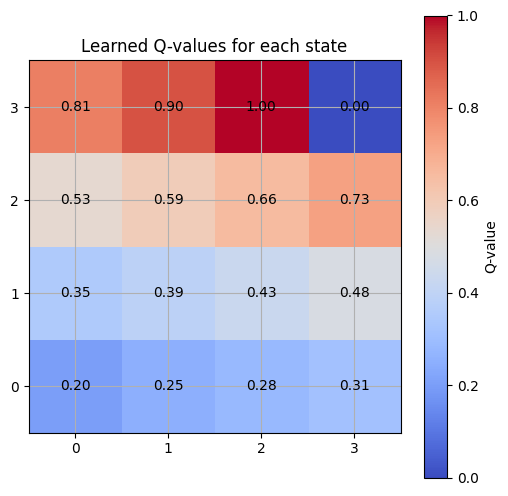

Learned Q-table: 
[[0.0303959  0.02532284 0.20120354 0.02062637]
 [0.05132837 0.13793984 0.25358648 0.10552344]
 [0.17540532 0.11183424 0.10818904 0.28241878]
 [0.16103248 0.18991167 0.3138105  0.1772871 ]
 [0.34867844 0.25125239 0.21445009 0.20709409]
 [0.30696949 0.29905165 0.32573261 0.38742049]
 [0.3756908  0.33174068 0.43046721 0.38096717]
 [0.43632259 0.45717671 0.40852232 0.4782969 ]
 [0.50062852 0.531441   0.50168306 0.48956812]
 [0.57235502 0.57559161 0.59049    0.55686318]
 [0.60375162 0.63576441 0.6561     0.63105579]
 [0.69811725 0.70076228 0.72196244 0.729     ]
 [0.79973445 0.78916301 0.81       0.79804271]
 [0.9        0.89123484 0.89790083 0.88999885]
 [1.         0.99030226 0.99800332 0.98521912]
 [0.         0.         0.         0.        ]]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

n_states = 16
n_actions = 4
goal_state = 15

Q_table = np.zeros((n_states, n_actions))

alpha = 0.1
gamma = 0.9
exploration_prob = 0.2
epochs = 1000

for epoch in range(epochs):
    current_state = np.random.randint(0, n_states)

    while current_state != goal_state:
        if np.random.rand() < exploration_prob:
            action = np.random.randint(0, n_actions)
        else:
            action = np.argmax(Q_table[current_state])
        next_state = (current_state + 1) % n_states
        reward = 1 if next_state == goal_state else 0
        Q_table[current_state, action] += alpha * (reward + gamma * np.max(Q_table[next_state]) - Q_table[current_state, action])
        current_state = next_state
q_values_grid = np.max(Q_table, axis=1).reshape((4, 4))
plt.figure(figsize=(6, 6))
plt.imshow(q_values_grid, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Q-value')
plt.title('Learned Q-values for each state')
plt.xticks(np.arange(4), ['0', '1', '2', '3'])
plt.yticks(np.arange(4), ['0', '1', '2', '3'])
plt.gca().invert_yaxis()
plt.grid(True)
for i in range(4):
    for j in range(4):
        plt.text(j, i, f'{q_values_grid[i, j]:.2f}', ha='center', va='center', color='black')

plt.show()
print("Learned Q-table: ")
print(Q_table)